#    Project:                            Confused Person EGG Brainwave

The purpose of this project is the trial of developing some automation able to analyze a brainwave and to classify it, in order to understand if the person on which the signal has been extracted was in a mental state of confusion at the moment. 

We want to understand if there are some patterns in the brainwaves signals able to correlate different frequencies to our specific mental state research. What are the frequencies that affect the confusion state the most?

Furthermore, we want to build a classifier able to define if a brainwave signal sample owns to a confused person or not. Our question is “Is this signal a confusion mental state?” 

In order to do this, we are going to use unsupervised and supervised Machine Learning techniques. 

## 1) Data Loading

At first, it is necessary to load our dataset: EGG brainwaves samples and people demographic info. Every sample is associated to the person from who it has been detected. People data presents age, ethnicity and Sex. These two datasets are correlated by a feature 'SubjectID'

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_samples = pd.read_csv("data/EEG_data.csv")
df_people = pd.read_csv("data/datasets_106_24522_demographic_info.csv")

##  2) Data Exploration
Let's explore our datasets

### 2.1 Data Structure
At first, we want to understand which are the features and how data is structured. How large is the dataset? How many features has it? What types of features are there?

In [3]:
print(f"EGG Brainwave samples shape: {df_samples.shape}")
print(f"People info: {df_people.shape}")

EGG Brainwave samples shape: (12811, 15)
People info: (10, 4)


In [4]:
df_samples.head(5)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [5]:
df_people.head(5)

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


In [6]:
df_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB


In [7]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject ID  10 non-null     int64 
 1    age        10 non-null     int64 
 2    ethnicity  10 non-null     object
 3    gender     10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


#### Data structure
The data is composed of two different dataframes. The first one has the Brainwaves samples, with references to the main brain spectrum frequencies. The second one, has information about people involved in the test. There are 12811 sasmples and 10 people. Every sample feature is a numerical value. In the demographic dataset, instead, there are two categorical features: Sex and Ethnicity

### 2.2 Joining datasets
The samples dataset contain an "External Key" related to the people dataset "Primary Key". We don't want to study these datasets separately, thus, we join them. The key feature (external/internal) is "SubjectID" for both.

In [8]:
#Dataframes Inner Join
EGG_dataset = pd.merge(left=df_samples, right=df_people, left_on='SubjectID', right_on='subject ID')
#duplicated column drop
EGG_dataset.drop(columns='SubjectID', inplace=True)

In [9]:
print(f"Complete dataset shape: {EGG_dataset.shape}")

Complete dataset shape: (12811, 18)


In [10]:
EGG_dataset.head(5)

,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,subject ID,age,ethnicity,gender
0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,0,25,Han Chinese,M
1,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,0,25,Han Chinese,M
2,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,0,25,Han Chinese,M
3,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,0,25,Han Chinese,M
4,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,0,25,Han Chinese,M


### 2.3 Searching for missing values
The algorithms does not allows the data to be missing, thus we have to be sure of it. If data has some NaNs values, we have to imupte them. If there are columns or rows with a high values of NaNs, they will be dropped.

In [11]:
EGG_dataset.isnull().sum()

VideoID               0
Attention             0
Mediation             0
Raw                   0
Delta                 0
Theta                 0
Alpha1                0
Alpha2                0
Beta1                 0
Beta2                 0
Gamma1                0
Gamma2                0
predefinedlabel       0
user-definedlabeln    0
subject ID            0
 age                  0
 ethnicity            0
 gender               0
dtype: int64

There aren't missing values: great!
In case of a new signal with missing values, we shoul be sure to impute it. For this reason, we build an imputation function able to fill NaNs with the mean value of the k-nearest neighbours.

In [12]:
from sklearn.impute import KNNImputer

def impute_dataset(df):
    imputer = KNNImputer(missing_values=np.nan)
    ds_idxs = df.index
    ds_cols = df.columns 
    df = pd.DataFrame(imputer.fit_transform(df), index=ds_idxs, columns=ds_cols)
    return df

##  3) Feature transformation

### 3.1 Encoding categorical features
The algorithms want the data to be numerical. Thus, we have to search for categorical features and to encode them.

In [13]:
import numbers

def encode_categorical_features(df):
    '''
    This function encodes features with non numerical values.
    Features with two values are incoded into 0 an 1 (binaries).
    Features with more than two non numerical values are one-hot encoded with dummies
    '''
    to_binaries = []
    to_encode = []
    
    for feature in df.columns:
        values = df[feature].unique()
        values = [x for x in values if not pd.isnull(x)]
        if not all(isinstance(value, numbers.Number) for value in values):
            if len(values) == 2:
                to_binaries.append(feature)
            else:
                to_encode.append(feature)

    for binary in to_binaries:
        values = df[binary].unique()
        values = [x for x in values if not pd.isnull(x)]
        df[binary] = df[binary].map(lambda x: 0 if x == values[0] else 1 if x == values[1] else np.nan)

    df = pd.get_dummies(df, columns=to_encode)
    
    return df

In [14]:
encoded_df = encode_categorical_features(EGG_dataset)

In [15]:
encoded_df.head(5)

,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,subject ID,age,gender,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese
0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,0,25,0,0,0,1
1,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,0,25,0,0,0,1
2,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,0,25,0,0,0,1
3,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,0,25,0,0,0,1
4,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,0,25,0,0,0,1


### 3.2 Feature selection
The dataset may have some features usless for our problem. If we apply our algorithms on the dataset, training our models with these features, we may obtain different results. Furthermore, the more features we have, the more computationally expensive our processes will be.

There are two features that we don't need for. The first is the VideoID. This information is correlated to the context of the experiment and it is not a valuable data of the EGG brainwave. For this reason, we drop it. Another usless feature, is the 'predefinedlabel'. This feature indicates which confusion state was supposed to be detected by the experiment conductor before doing the test. We need for the 'user-definedlabel' because that's the label indicating if a signal is correlated to a confusion state.

In [16]:
selected_df = encoded_df.drop(columns=['VideoID', 'predefinedlabel'])

In [17]:
selected_df.head(5)

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln,subject ID,age,gender,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0,25,0,0,0,1
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0,25,0,0,0,1
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0,25,0,0,0,1
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0,25,0,0,0,1
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0,25,0,0,0,1


What about Sex, Age and Ethnicity? Are these features useful for our purpose? A brain may work in similar but different ways on Male and Females. Age should impact the brain activity too.  Ethnicity? We don't know this without an important background. However, we can study feature variance by applying PCA, after that we can do a better evaluation.

Moreover, what about SubjectID? This feature indicates the Identifier of the people who generated the detected brainwave. This is clearly unuseful for our purpose, but for now let's hold it. In order to find outliers, we want to look at the data and to see if some students samples are distant from the other ones. For this reason, we will drop the feature in a second moment.

### 3.3 Feature scaling
Before we apply dimensionality reduction and unsupervised techniques to the data, we need to perform feature scaling. By this way, the principal component vectors are not influenced by the natural differences in scale for features.

In [18]:
from sklearn.preprocessing import StandardScaler

def scale_dataset(df, scaler=None):
    ds_idxs = df.index
    ds_cols = df.columns
    
    if scaler == None:
        scaler = StandardScaler()
        scaler = scaler.fit(df.values)
        
    df = pd.DataFrame(scaler.transform(df.values), index=ds_idxs, columns=ds_cols)
    return df, scaler

In [19]:
scaled_df, scaler = scale_dataset(selected_df)

In [20]:
scaled_df.head(5)

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln,subject ID,age,gender,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese
0,0.634334,-0.184623,0.355294,-0.476510,-0.317217,-0.105613,-0.157642,0.094523,0.087938,0.045544,-0.169923,-1.025539,-1.566138,-0.185918,-0.501561,-0.335339,-0.333752,0.502048
1,-0.056750,-0.537745,-0.193295,-0.834378,-0.573352,-0.551518,-0.530654,-0.562100,-0.435821,-0.304417,-0.324028,-1.025539,-1.566138,-0.185918,-0.501561,-0.335339,-0.333752,0.502048
2,0.245599,0.036078,0.059256,0.239285,0.883532,2.217577,0.496016,0.312017,1.168583,0.346396,0.303549,-1.025539,-1.566138,-0.185918,-0.501561,-0.335339,-0.333752,0.502048
3,0.245599,0.433339,-0.118031,2.205862,-0.158536,0.274088,-0.276091,-0.334314,0.307573,0.255157,0.541603,-1.025539,-1.566138,-0.185918,-0.501561,-0.335339,-0.333752,0.502048
4,0.116021,0.256779,-0.123049,0.626350,0.763033,-0.059126,0.955168,0.546890,0.777338,0.190389,0.425518,-1.025539,-1.566138,-0.185918,-0.501561,-0.335339,-0.333752,0.502048


### 3.3 Principal Component Analysis (PCA)
Data is ready for PCA. At first, we will apply PCA without indicating how many final features we want. By this way, we will be able to see the variance of each component. After taht, we will take a good decision on features.

In [21]:
from sklearn.decomposition import PCA

def do_pca(df, n_components = None, pca=None):
    if pca == None:
        if n_components == None: 
            pca = PCA()
        else:
            pca = PCA(n_components=n_components)
            
    df_reduced = pca.fit_transform(df)
    return pca, df_reduced

In [22]:
def pca_variance_plot(variance): #function inspired by the one used in an excercise of the lessons.
    n_components = len(variance)
    idxs = np.arange(n_components)
 
    plt.figure(figsize=(20, 10))
    ax = plt.subplot(111)
    cumvals = np.cumsum(variance)
    ax.bar(idxs, variance)
    ax.plot(idxs, cumvals)
 
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=5, length=20)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained")
    plt.title('Explained Variance Per Principal Component')

In [23]:
pca, dataset_reduct = do_pca(scaled_df)

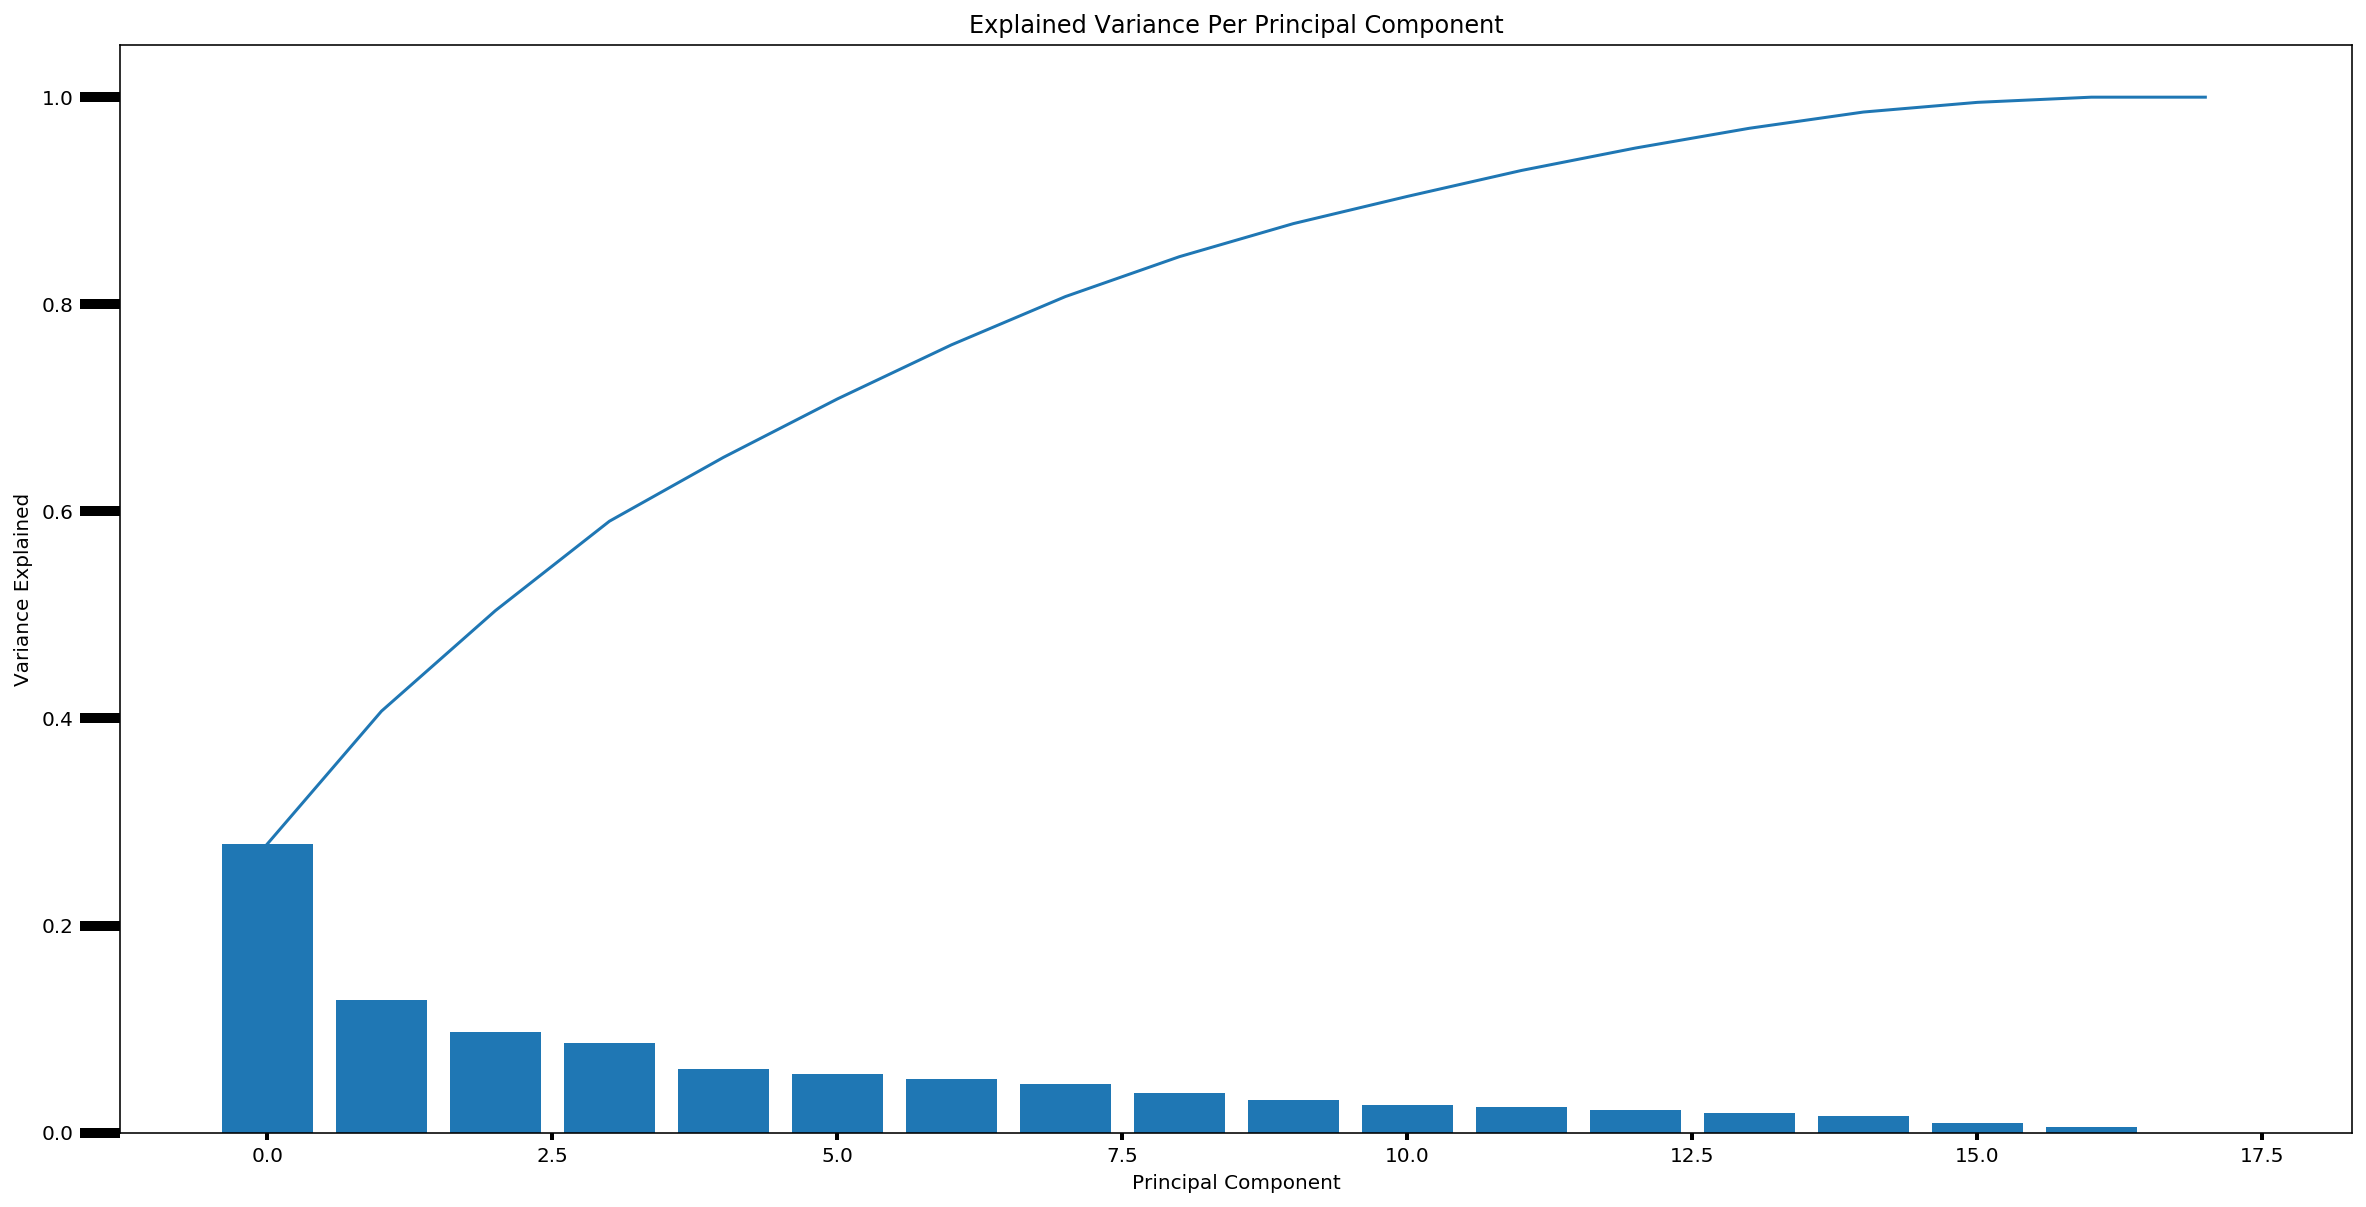

In [24]:
pca_variance_plot(pca.explained_variance_ratio_)

In [25]:
def pca_results(full_dataset, pca): #This function has taken from an excercise of the PCA lessons (in helper_functions.py)
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    dimensions = dimensions = ['{}'.format(i) for i in range(1,len(pca.components_)+1)]
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
    components.index = dimensions
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))
    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl Var\n          %.4f"%(ev))
    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

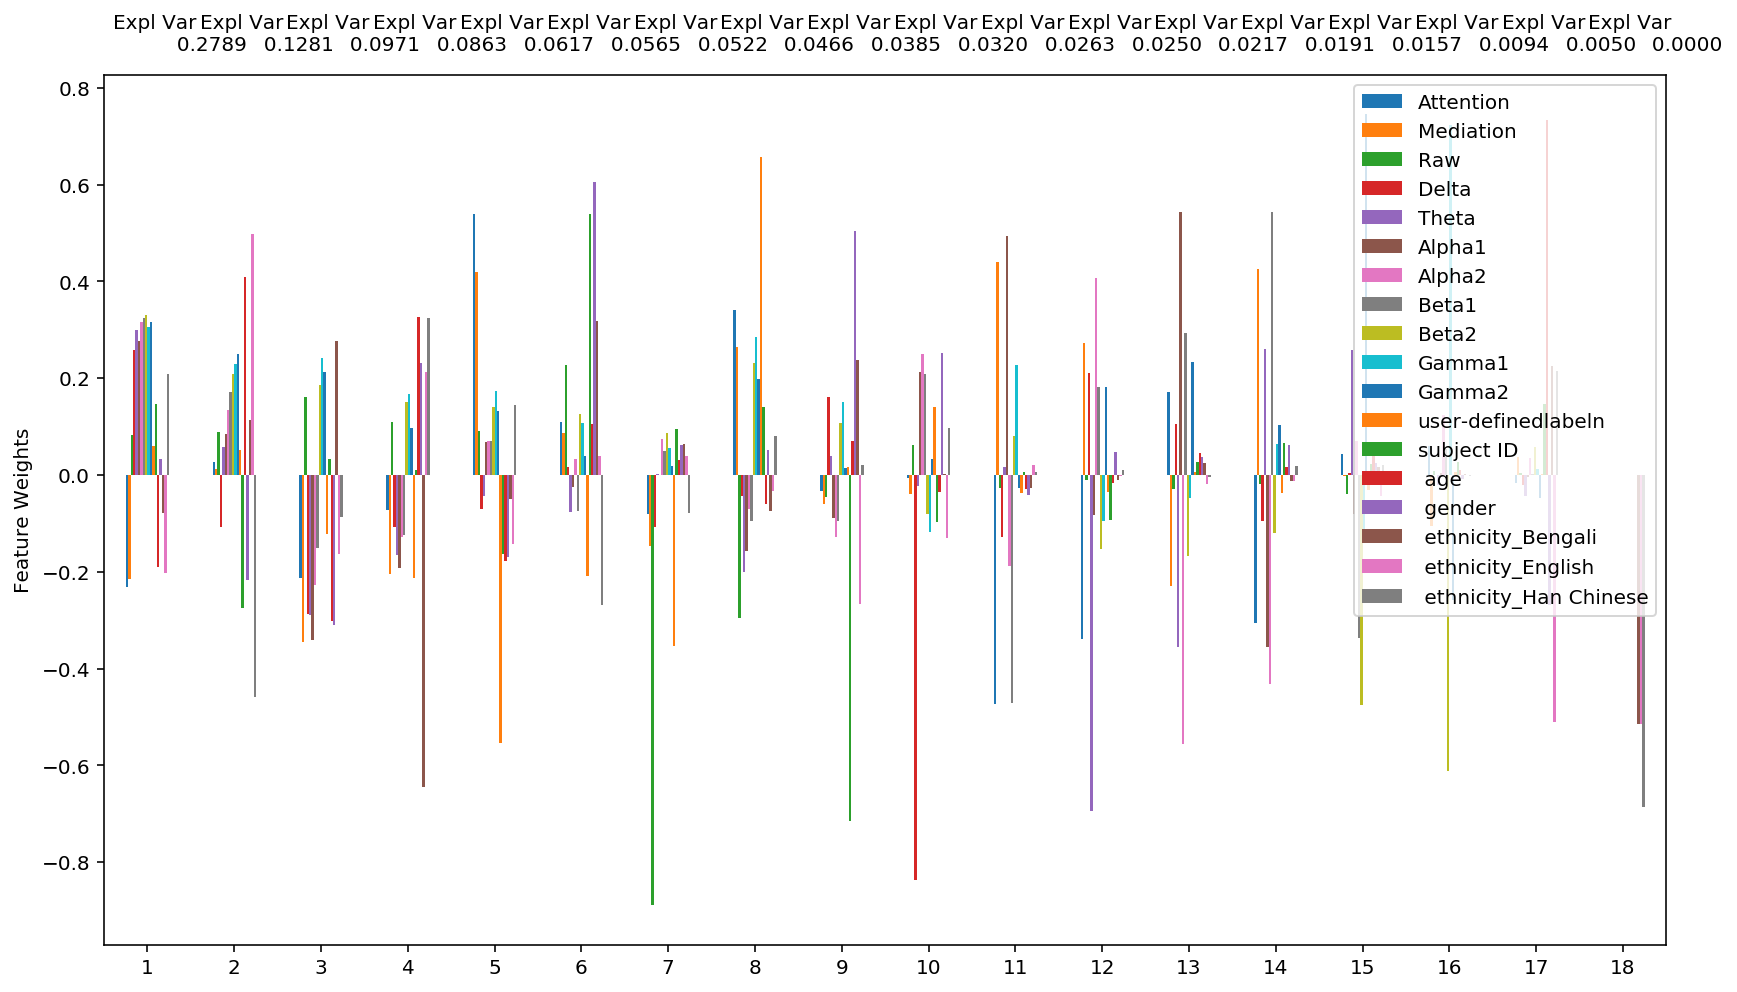

In [26]:
pca_res = pca_results(scaled_df, pca)

In [27]:
pca_res = pd.DataFrame(pca_res)
display(pca_res)

,Explained Variance,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln,subject ID,age,gender,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese
1,0.2789,-0.2315,-0.2150,0.0832,0.2587,0.2998,0.2771,0.3152,0.3245,0.3299,0.3060,0.3155,0.0595,0.1461,-0.1907,0.0331,-0.0779,-0.2016,0.2096
2,0.1281,0.0275,0.0116,0.0886,-0.1065,0.0587,0.0837,0.1334,0.1722,0.2085,0.2300,0.2495,0.0517,-0.2747,0.4101,-0.2177,0.1140,0.4970,-0.4579
3,0.0971,-0.2122,-0.3451,0.1621,-0.2878,-0.2889,-0.3415,-0.2279,-0.1502,0.1853,0.2413,0.2122,-0.1227,0.0324,-0.3015,-0.3107,0.2776,-0.1624,-0.0871
4,0.0863,-0.0727,-0.2054,0.1103,-0.1085,-0.1655,-0.1921,-0.1286,-0.1238,0.1517,0.1666,0.0972,-0.2128,0.0097,0.3266,0.2311,-0.6447,0.2126,0.3254
5,0.0617,0.5390,0.4185,0.0905,-0.0707,-0.0435,0.0689,0.0692,0.0705,0.1398,0.1738,0.1313,-0.5542,-0.1640,-0.1770,-0.1700,-0.0502,-0.1423,0.1443
6,0.0565,0.1093,0.0860,0.2271,0.0175,-0.0767,-0.0255,0.0332,-0.0741,0.1263,0.1071,0.0396,-0.2091,0.5387,0.1047,0.6051,0.3186,0.0398,-0.2693
7,0.0522,-0.0797,-0.1477,-0.8888,-0.1081,0.0021,-0.0010,0.0750,0.0505,0.0858,0.0566,0.0181,-0.3543,0.0960,0.0304,0.0610,0.0642,0.0393,-0.0777
8,0.0466,0.3417,0.2641,-0.2959,-0.0430,-0.2008,-0.1567,-0.0709,-0.0952,0.2304,0.2850,0.1989,0.6573,0.1398,-0.0605,0.0525,-0.0743,-0.0340,0.0814
9,0.0385,-0.0338,-0.0596,-0.0455,0.1613,0.0395,-0.0879,-0.1290,-0.0956,0.1068,0.1509,0.0148,0.0161,-0.7143,0.0695,0.5049,0.2373,-0.2660,0.0208
10,0.0320,-0.0053,-0.0383,0.0622,-0.8374,-0.0232,0.2138,0.2497,0.2086,-0.0812,-0.1171,0.0327,0.1406,-0.0965,-0.0344,0.2514,0.0025,-0.1312,0.0964


As we can see above, features correlated to the people are low impactive on the dataset. For this reason, we can drop them, without using PCA. Thus, we don't apply PCA to the dataset in order to get a feature extraction. We hust drop the usless columns.

In [28]:
reduced_df = scaled_df.drop(columns=[' age', ' gender', ' ethnicity_Bengali',' ethnicity_English', ' ethnicity_Han Chinese'])

##  4) Searching for outliers
The dataset may have some outlier students. Every student has generated many samples. It is possible that some students labeled itself as confused or not confused, was wrong. Now, we look at the data in order to find students with feature showing very distant median values from the other ones.

In [29]:
data_subset = {}
for v in reduced_df['user-definedlabeln'].unique():
    data_subset[v] = reduced_df[reduced_df['user-definedlabeln'] == v]

In [30]:
print(data_subset.keys())

dict_keys([-1.0255387171989436, 0.975097266665175])


In [31]:
data_subset[0.975097266665175].groupby(['subject ID']).agg('mean')

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
subject ID,,,,,,,,,,,,
-1.566138,0.175152,-0.011005,-0.059184,0.318248,0.124055,0.011692,-0.100102,-0.045081,-0.018444,0.129295,0.061525,0.975097
-1.217130,-0.257546,0.236983,-0.048775,-0.053570,0.029664,0.010593,-0.091776,-0.030336,-0.266001,-0.266995,-0.272414,0.975097
-0.868121,0.778001,0.616389,-0.049558,-0.860502,-0.593798,-0.446480,-0.405973,-0.372298,-0.345077,-0.290861,-0.266404,0.975097
-0.519113,-0.056683,0.167614,-0.051066,0.429498,0.433496,0.318023,0.115082,0.113200,-0.205489,-0.219852,-0.215987,0.975097
-0.170104,-0.043740,0.082434,-0.050423,-0.303118,-0.200076,-0.208302,-0.212967,-0.156582,-0.276524,-0.218337,-0.135613,0.975097
0.178904,0.177966,0.329060,-0.056384,0.441863,0.504977,0.393256,0.187647,0.266142,-0.152874,-0.193076,-0.243779,0.975097
0.527912,-1.784458,-2.082651,0.472321,0.321388,0.536927,0.586970,1.110550,1.235516,1.546381,1.311083,1.780122,0.975097
0.876921,-0.106128,0.099631,-0.048500,0.137430,-0.038222,-0.070736,-0.158460,-0.120919,-0.112941,-0.081309,0.051781,0.975097
1.225929,-0.329801,-0.013195,-0.053740,0.611071,0.571964,0.532125,0.418430,0.324875,-0.064051,-0.121933,-0.108071,0.975097


In [32]:
data_subset[-1.0255387171989436].groupby(['subject ID']).agg('mean')

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
subject ID,,,,,,,,,,,,
-1.566138,0.463526,0.137041,-0.049401,-0.079091,-0.147780,-0.164685,-0.200454,-0.167752,-0.006978,0.089025,0.010623,-1.025539
-1.217130,0.480852,0.634896,-0.056641,-0.430281,-0.309199,-0.229508,-0.230934,-0.135661,-0.340621,-0.293397,-0.275394,-1.025539
-0.868121,0.483125,0.591083,-0.056485,-0.916609,-0.625706,-0.482017,-0.450010,-0.481244,-0.408168,-0.335563,-0.337569,-1.025539
-0.519113,-0.053047,-0.297396,-0.053774,0.123350,0.007281,-0.005710,-0.082311,-0.158214,-0.138618,-0.211915,-0.288900,-1.025539
-0.170104,0.433945,0.490279,-0.037489,-0.487516,-0.301457,-0.251043,-0.251699,-0.215892,-0.310456,-0.246533,-0.182426,-1.025539
0.178904,0.308163,0.281390,-0.045177,-0.100387,-0.011215,-0.016723,-0.035443,-0.237937,-0.224155,-0.209239,-0.334614,-1.025539
0.527912,-1.784458,-2.082651,0.472901,0.126036,0.145062,0.114927,0.446730,0.679254,1.549016,1.560742,1.333831,-1.025539
0.876921,0.571452,0.183816,-0.049661,-0.373972,-0.343069,-0.295101,-0.294702,-0.167953,-0.123406,-0.119183,0.006332,-1.025539
1.225929,0.415664,0.230156,-0.047508,0.178774,0.086919,-0.050603,-0.128893,-0.125373,-0.250992,-0.211130,-0.158485,-1.025539


We can note that students 3 (-0.868121) and 7 (0.527912) has very distant mean values for a lot of features respect to the other students, both for confused and not confused. We have to reject these samples. After that, we can drop the Suvject ID column.

In [33]:
reduced_df['subject ID'].unique()

array([-1.56613795, -1.21712958, -0.86812121, -0.51911284, -0.17010446,
        0.17890391,  0.52791228,  0.87692065,  1.22592903,  1.5749374 ])

In [34]:
reduced_df = reduced_df[reduced_df['subject ID'] != -0.8681212082604366]

In [35]:
reduced_df = reduced_df[reduced_df['subject ID'] != 0.5279122818574891]

In [36]:
reduced_df['subject ID'].unique()

array([-1.56613795, -1.21712958, -0.51911284, -0.17010446,  0.17890391,
        0.87692065,  1.22592903,  1.5749374 ])

In [37]:
reduced_df.drop(columns=['subject ID'], inplace=True)

In [38]:
reduced_df.head(5)

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,0.634334,-0.184623,0.355294,-0.476510,-0.317217,-0.105613,-0.157642,0.094523,0.087938,0.045544,-0.169923,-1.025539
1,-0.056750,-0.537745,-0.193295,-0.834378,-0.573352,-0.551518,-0.530654,-0.562100,-0.435821,-0.304417,-0.324028,-1.025539
2,0.245599,0.036078,0.059256,0.239285,0.883532,2.217577,0.496016,0.312017,1.168583,0.346396,0.303549,-1.025539
3,0.245599,0.433339,-0.118031,2.205862,-0.158536,0.274088,-0.276091,-0.334314,0.307573,0.255157,0.541603,-1.025539
4,0.116021,0.256779,-0.123049,0.626350,0.763033,-0.059126,0.955168,0.546890,0.777338,0.190389,0.425518,-1.025539


##  5) Preprocessing function
Building a function with pre-processing steps, accordig to the previous data exploration and analysis

In [39]:
from sklearn.impute import KNNImputer
import numbers

def impute_dataset(df):
    imputer = KNNImputer(missing_values=np.nan)
    ds_idxs = df.index
    ds_cols = df.columns 
    df = pd.DataFrame(imputer.fit_transform(df), index=ds_idxs, columns=ds_cols)
    return df

def remove_outliers(EGG_data_df):
    EGG_data_df = EGG_data_df[EGG_data_df['SubjectID'] != 2] #remove outlier student 3
    EGG_data_df = EGG_data_df[EGG_data_df['SubjectID'] != 6] #remove outlier student 7
    return EGG_data_df

def preprocess_data(EGG_data_df):
    
    EGG_data_df = impute_dataset(EGG_data_df)
    EGG_data_df = remove_outliers(EGG_data_df)
    EGG_data_df.drop(columns=['VideoID', 'predefinedlabel', 'SubjectID'], inplace=True)
    return EGG_data_df
    

In [40]:
dataset = pd.read_csv("data/EEG_data.csv")
dataset = preprocess_data(dataset)

In [41]:
dataset.head(5)

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0


##  5) Shuffle and Split Data
Data is ready for supervised classification. Let's shuffle samples and split them in training and testing data

In [42]:
# Import train_test_split
from sklearn.model_selection import train_test_split

y = dataset['user-definedlabeln']
X = dataset.drop(columns=['user-definedlabeln'])

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 8201 samples.
Testing set has 2051 samples.


##  6) Model training, tuning and selection
A supervised model has to be selected as the final model. In order to do this, we will train three different models and evaluate them. After that we will choose the best one. Every model will be tuned using different hyperparameters.

### 6.1 Algorithms selection

- Decision Trees 

Decision Trees model is used for classification problems. This algorithm is able to analyse data features and to understand how much information each of these fetaures can give to us, in order to make our prediction. The model can make really accurate predictions, because of each feature can be combined with every other feature according to its specific information gain. This type of model has also a bad behavior. It tends to overfit a lot, thus, we have to use it with high attention or use it with any ensemble method. 

- Ensemble Methods 

Ensemble methods are able to solve classification problems combining different classification models. It can be used for real world applications, especially when data is not linearly separable. We can make a prediction using different models combined with an ensemble method, such as Ada Boost or Bagging or Random Forest. Furthermore, they are able to create models fitting data well because of their ability of finding a good compromise between bias and variance. We will use AdaBoost

- Support Vector Machine 

Support Vector Machine is able to make good classification predictions, defining models with a well-fitted boundary. This boundary is so good because of the use of the margin. This model has a high flexibility because of its parameters. This alorithm is able to work on different types of data, in fact, it has three kernels: linear, polynomial and Rbf. Moreover, an SVM model can give us the ability of tuning it in order to decide how much the model has to be precise: with the C parameter we can define how much weight we want to assign to the Classification error respect to the margin error. 

### 6.2 Creating a Training and Tuning Pipeline
#### 6.2.1 Creating a tuning function and an evaluation function
In order to evaluate models, we have to create a training and tuning pipeline: every model is trained and tuned.
Thus, we have to define a function able to:
 - Fit the learner to the sampled training data and record the training time.
 - getting best estimator from grid search
 - Perform predictions on the test data X_test, and also on the first 300 training points.
 - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.


In [49]:
from sklearn.metrics import fbeta_score, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV


def get_best_estimator(learner, hyperparameters_combinations, X_train, y_train):
    '''
    This function takes a classifier and a combination of parameters.
    It returns a model tuned by the hyperparameters combination.
    '''
    #Get a scorer for Grid Search
    scorer = make_scorer(fbeta_score, beta=0.5)
    #Perform grid search on the classifier using 'scorer' as the scoring method 
    grid_obj = GridSearchCV(learner, hyperparameters_combinations, scoring=scorer)
    #Fit the grid search object to the training data and find the optimal parameters
    grid_fit = grid_obj.fit(X_train, y_train)
    # Get the nest estimator
    learner = grid_fit.best_estimator_
    #return
    return learner

In [54]:
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - hyperparameters_combinations: the dictionary containing hyperparameters possible values, for GridSearch Tuning
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    results = {}
    
    #Fit the learner to the training data again in order to record the training time
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    #Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #then get predictions on the first 300 training samples(X_train)
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    #Calculate the total prediction time
    results['pred_time'] = end - start
   
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
   
    #Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    #Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
    
    #Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
        
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print('Classifier {} Accuracy {} f_score {}'.format(learner.__class__.__name__, results['acc_test'], results['f_test']))
          
    # Return the results
    return results

#### 6.2.2 Classifiers creation and tuning
Now the function in created. We have to run the pipeline on the three selected classifiers. At first, we obtain the best estimator for every algorithm. After that, we train and test every of them in order to evaluate their performance.

In [52]:
#Import the models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

#Initialize classifiers
clf_A = DecisionTreeClassifier(random_state = 0)
parameters_A = {'max_depth': list(range(10, 30)),
                'min_samples_split': list(range(2, 15)),
                'min_samples_leaf': list(range(1, 20))
               }
clf_B = AdaBoostClassifier(random_state = 0)
parameters_B = {'algorithm':['SAMME','SAMME.R'],
                'n_estimators':[5,10,12,15,18,20,25,35,50,80,100,120]
               }
clf_C = SVC(random_state = 0)
parameters_C = {'kernel': ['rbf'],
                'C': list(np.arange(0.5, 1.5, 0.1)),
                'gamma': ['scale', 'auto']
               }

#Collect results on the learners
best_estimators = {}
for clf, params in [(clf_A, parameters_A), (clf_B, parameters_B), (clf_C, parameters_C)]:
    print(f'searching for best estimator: classifier {clf.__class__.__name__}')
    best_estimators[clf.__class__.__name__] = get_best_estimator(clf, params, X_train, y_train)

searching fpor best estimator: classifier DecisionTreeClassifier
searching fpor best estimator: classifier AdaBoostClassifier
searching fpor best estimator: classifier SVC


#### 6.2.3 Classifiers evaluation metrics collection
We have the best estimator for every algorithm we decided to use. Now, It is time to evaluate them. Let's train the models on different percentage of data. We'll evaluate the accuracy score, fscore and execution-time for every model using training and testing datasets. Looking at these results, we will able to detect the best model according to its performance, accuracy and bias-variance balance.

In [55]:
#Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int((len(y_train)/100)*10)
samples_1 = int((len(y_train)/100)*1)

#Collect results on the learners
results = {}
for clf, params in [(best_estimators['DecisionTreeClassifier'], parameters_A),
                    (best_estimators['AdaBoostClassifier'], parameters_B),
                    (best_estimators['SVC'], parameters_C)
                   ]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 82 samples.
Classifier DecisionTreeClassifier Accuracy 0.5865431496830814 f_score 0.608843537414966
DecisionTreeClassifier trained on 820 samples.
Classifier DecisionTreeClassifier Accuracy 0.5860555826426134 f_score 0.605912294440094
DecisionTreeClassifier trained on 8201 samples.
Classifier DecisionTreeClassifier Accuracy 0.6187225743539737 f_score 0.637962962962963
AdaBoostClassifier trained on 82 samples.
Classifier AdaBoostClassifier Accuracy 0.590443686006826 f_score 0.6112737920937041
AdaBoostClassifier trained on 820 samples.
Classifier AdaBoostClassifier Accuracy 0.6045831301803998 f_score 0.6245447924253459
AdaBoostClassifier trained on 8201 samples.
Classifier AdaBoostClassifier Accuracy 0.6431009263773769 f_score 0.6603773584905661
SVC trained on 82 samples.
Classifier SVC Accuracy 0.5933690882496343 f_score 0.6156832298136646
SVC trained on 820 samples.
Classifier SVC Accuracy 0.6099463676255485 f_score 0.6295421511627906
SVC trained on 82

#### 6.2.4 Classifiers evaluation
We want to evaluate the results obtained above. Thus, we want to buil a function able to display models metrics in order to have an easy way to compare them with a graph visualization

In [60]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score

#taken from a notebook used in the lessons
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (11,8))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, x = 0.63, y = 1.05)
    # Tune the subplot layout
    # Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html for more details on the arguments
    pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
    pl.tight_layout()
    pl.show()

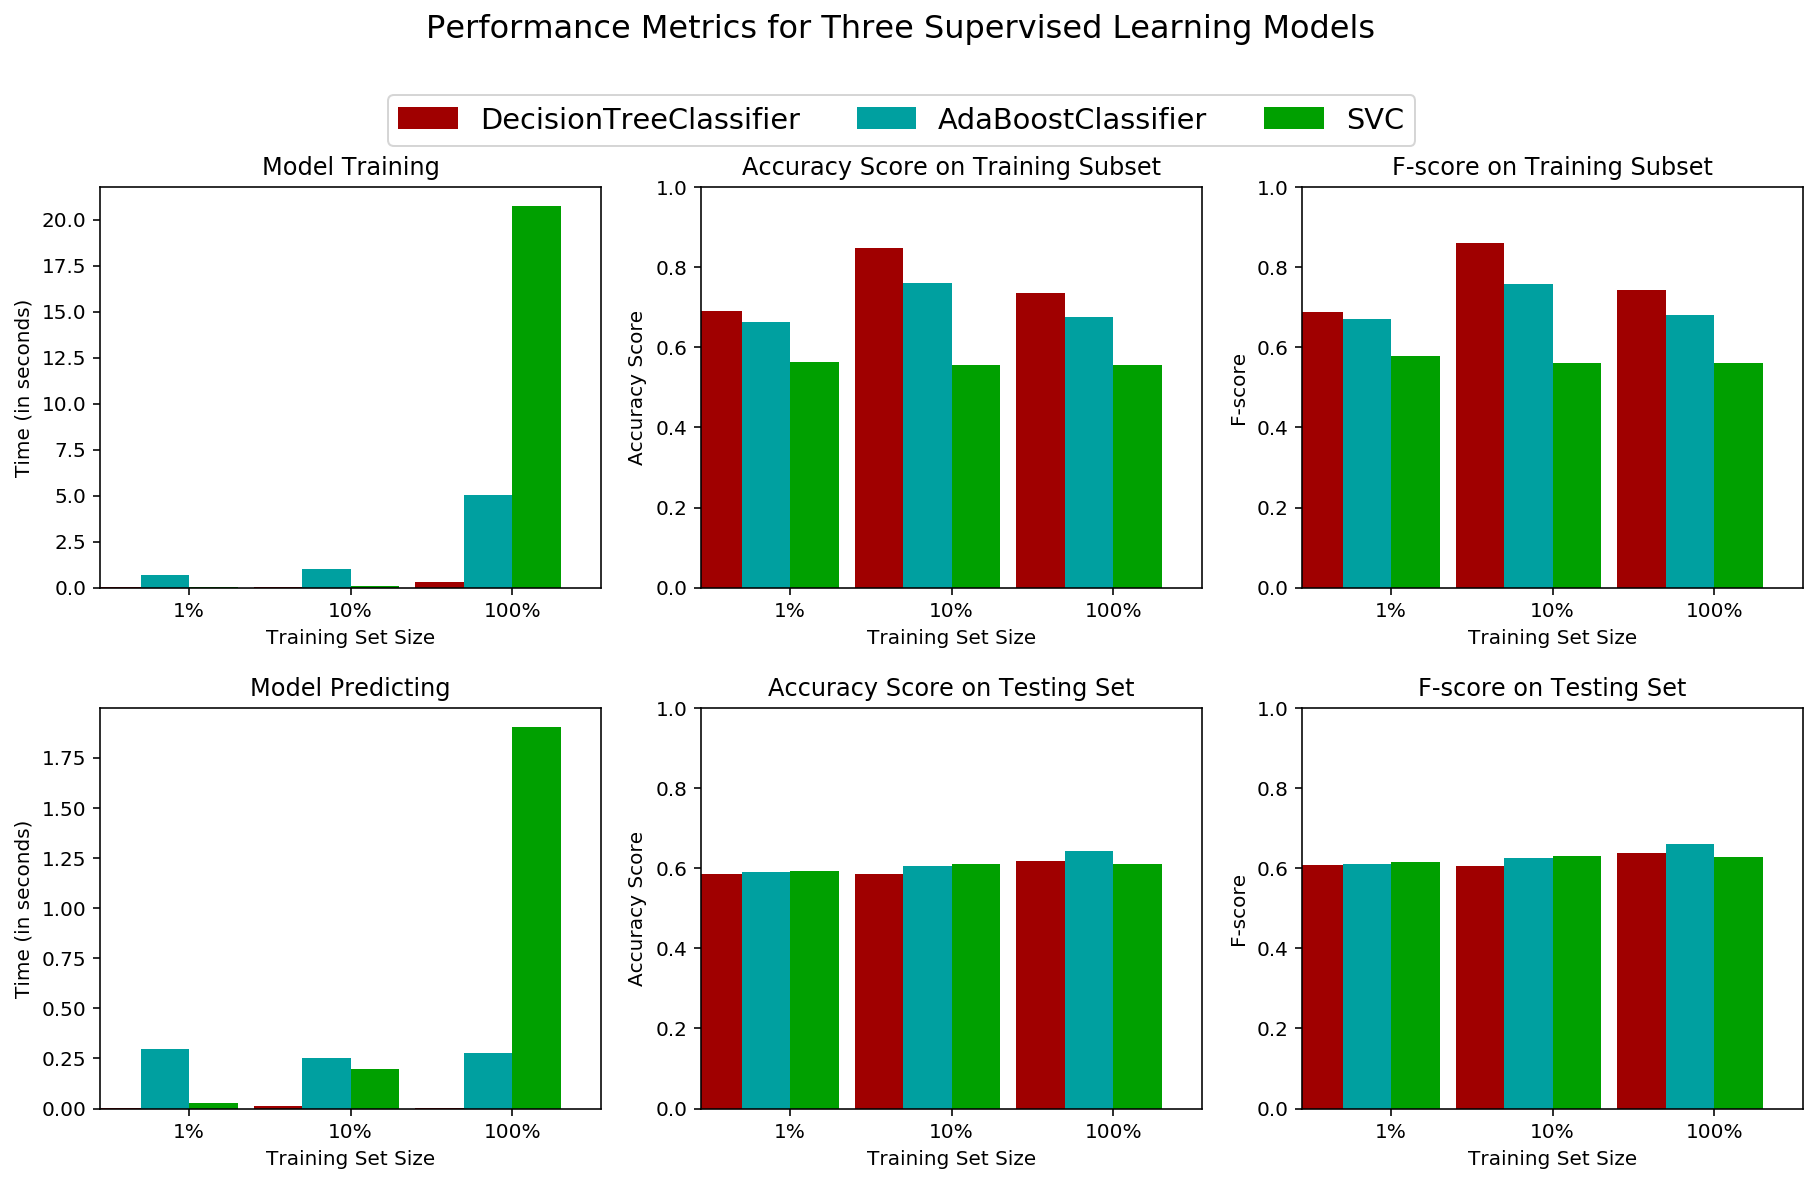

In [61]:
evaluate(results)

### 6.3 Model selection
Looking at the data displayed by our function, we can see the models behavior. For example, we can note that Decision Trees model overfits a bit: the scores of testing data are very lower than the training ones and they increase just a little respect to the data size increasing. Furthermore, the training scores decrease when the data size increases. For these reasons, we don't want to select DecisionTrees model. SVM and AdaBoost model seem to be quite good according to bias-variance balancement. AdaBoost seems to overfit a bit more than SVM, but I think it does not overfit a lot. Ada Boost obtains the best accuracy and fScore result. Moreover, AdaBoost speed is higher than the SVM's one. For these reasons, we select AdaBoost. 

In [64]:
selected_model = best_estimators['AdaBoostClassifier']

## 7) Visualize Feature importance
One of the purposes of our project is understanding what features are most correlated to the brainwave confusion detection. When applying PCA to the data we could see what features had the higher variance. Now that we trained a supervised model, we cann see how much any feature is relevant for the final classification and as a consequence which features are more relevant in the confusion state brainwave. Let's build a function able to display this ranking.

In [65]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  

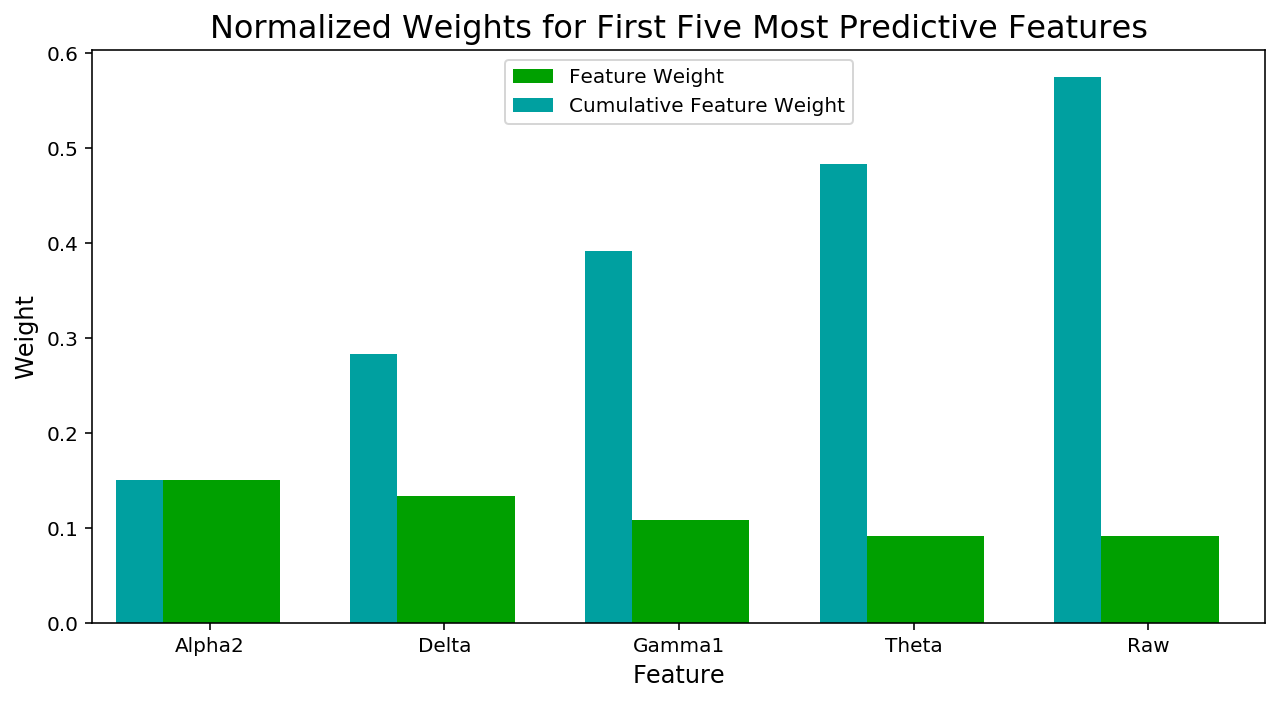

In [66]:
feature_plot(selected_model.feature_importances_, X_train, y_train)